# Оглавление
   [Определение перспективного тарифа для телеком компании. Введение](#шаг-0)
   
1. [Шаг 1. Загрузка файла с данными](#шаг-1)

2. [Шаг 2. Изучение общей информации и предобработка данных](#шаг-2)

    2.1. [Таблица calls (информация о звонках)](#шаг-2-1)

    2.2. [Таблица internet (информация о трафике)](#шаг-2-2)  
    
    2.3. [Таблица messages (информация о сообщениях)](#шаг-2-3)  
    
    2.4. [Таблица tariffs (информация о тарифах)](#шаг-2-4)    
    
    2.5. [Таблица users (информация о пользователях)](#шаг-2-5)    
    
    2.6. [Количество израсходованных минут по месяцам по каждому пользователю](#шаг-2-6)   
    
    2.7. [Количество израсходованных гигабайт  по месяцам по каждому пользователю](#шаг-2-7)    
    
    2.8. [Количество израсходованных сообщений  по месяцам по каждому пользователю](#шаг-2-8)   
    
    2.9. [Объединённая таблица](#шаг-2-9)  
    
    2.10. [Расчёт помесячной выручки для каждого абонента](#шаг-2-10)    

3. [Шаг 3. Анализ данных](#шаг-3)

    3.1. [Описание поведения абонентов](#шаг-3-1)
    
    3.1.1. [Тариф Smart](#шаг-3-1-1)
    
    3.1.2. [Тариф Ultra](#шаг-3-1-2) 
    
4. [Шаг 4. Проверка гипотез](#шаг-4)

    4.1. [Гипотеза: средняя выручка пользователей тарифов Смарт и Ультра различается](#шаг-4-1)
    
    4.2. [Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#шаг-4-2)
    
    
5. [Общие выводы](#шаг-5)

6. [Рекомендации](#шаг-6)


# Определение перспективного тарифа для телеком компании. Введение <a name="шаг-0"></a>

**Целью** данного исследования является определение лучшего тарифа для федерального оператора сотовой связи «Мегалайн»: необходимо понимание какой именно тариф приносит больше денег для дальнейшей корректировки рекламного бюджета.

**Заказчик исследования:** коммерческий департамент «Мегалайна»

**Задачи исследования:**  

- определить, кто является  клиентом
- каким тарифом пользуются клиенты
- сколько звонков и сообщений отправил каждый клиент за 2018 год
- анализ поведения клиентов
- оценка тарифов


Для анализа предлагается два тарифных плана «Смарт» и «Ультра»: 

*Тариф «Смарт»*
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

*«Мегалайн» всегда округляет вверх значения минут и мегабайтов.* 

**Объект исследования:** срез базы данных, состоящий из   500 пользователей «Мегалайна»

Срезы данных представлены для анализа в форматах csv и содержат следующие таблицы и атрибуты:

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



# Шаг 1. Загрузка файла с данными <a name="шаг-1"></a>

In [1]:
import pandas as pd #загружаем все необходимые библиотеки
import numpy as np
import random
import math as mt
from math import factorial
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import norm


try:
    calls = pd.read_csv('/datasets/calls.csv') #загружаем срезы
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except:
    calls = pd.read_csv(r'C:\Users\Larissa Olifirova\calls.csv') 
    internet = pd.read_csv(r'C:\Users\Larissa Olifirova\internet.csv') 
    messages = pd.read_csv(r'C:\Users\Larissa Olifirova\messages.csv') 
    tariffs = pd.read_csv(r'C:\Users\Larissa Olifirova\tariffs.csv') 
    users = pd.read_csv(r'C:\Users\Larissa Olifirovausers.csv') 

# Шаг 2. Изучение общей информации и предобработка данных <a name="шаг-2"></a>

## 2.1. Таблица calls (информация о звонках) <a name="шаг-2-1"></a>

In [2]:
calls.info() 
calls.sample(10) #смотрим как занесены данные 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
171270,1423_241,2018-11-16,0.87,1423
51380,1127_43,2018-09-09,0.00,1127
66102,1168_1253,2018-08-12,2.09,1168
15122,1040_121,2018-11-24,12.72,1040
92440,1230_27,2018-10-02,8.03,1230
169041,1416_208,2018-10-21,0.46,1416
108008,1279_262,2018-11-04,13.39,1279
92198,1229_34,2018-11-03,1.67,1229
15399,1041_97,2018-12-11,0.00,1041
44333,1112_37,2018-09-09,0.00,1112


call_date указан как object, который следует перевести в формат datatime. Также создадим дополнительный столбец с месяцами 

In [3]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [4]:
calls['month'] = calls['call_date'].values.astype('datetime64[M]')

In [5]:
calls['duration'] = calls['duration'].apply(np.ceil) #округляем минуты вверх

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 7.7+ MB


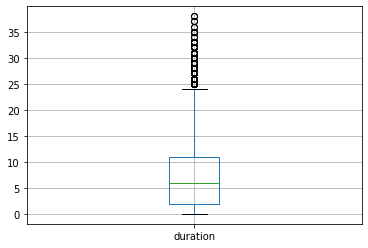

In [7]:
calls.boxplot(column='duration') #проверим распределение данных
plt.show()

Анализ таблиц и диаграммы "ящик с усами" показал, что таблица calls содержит огромное количество звонков с длительностью 0 минут. Вопрос требует уточнения вопроса у специалистов технического отдела. Предположим, что это звонки без установления соединения.
В таблице Calls все значения указаны в формате float, где после запятой встречаются значения более 59. Следовательно речь не идет о разделении "минуты запятая секунды", а скорее об особенностях биллинговой системы. Этот вопрос также следовало бы направить техническим специалистам отдела биллинга. Поскольку в компании принято, что  любой трафик (телефонный и интернет-трафик) округляется  вверх до целого значения, все значения будут округлены до целочисленного вверх, как было предусмотрено в условии. На более поздних этапах построения сводных таблиц округлим значения до минут вверх и сохраним этот показатель в формате integer, как предлагается в условии. Предположение, что округление значительно повлияет на результат здесь опустим.  

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 7.7+ MB


## 2.2. Таблица internet (информация о трафике)<a name="шаг-2-2"></a> 

In [9]:
internet.info() 
internet.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
123047,123047,1414_140,121.59,2018-10-28,1414
126133,126133,1423_590,465.39,2018-03-08,1423
56863,56863,1189_302,300.88,2018-12-04,1189
44765,44765,1154_323,238.61,2018-11-06,1154
133747,133747,1448_104,394.66,2018-12-28,1448
33458,33458,1118_75,634.47,2018-04-16,1118
97827,97827,1330_35,270.94,2018-02-12,1330
133250,133250,1446_33,663.74,2018-11-15,1446
29040,29040,1101_146,268.62,2018-10-30,1101
109748,109748,1373_670,353.83,2018-05-31,1373


In [10]:
internet['session_date'] = pd.to_datetime(internet['session_date']) #переводим даты сессий  в формат дат

In [11]:
internet['month'] = internet['session_date'].values.astype('datetime64[M]')  #создаём новый столбец с месяцами

In [12]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil) #округляем мегабайты вверх 

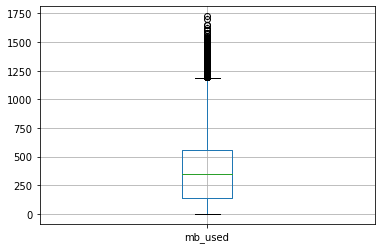

In [13]:
internet.boxplot(column='mb_used') #проверим распределение данных
plt.show()

"Ящик с усами" говорит о большом количестве выбросов о причине которых предстоит разобраться. 

Далее мегабайты следует перевести в гигабайты:

In [14]:
internet['gb_used'] = internet['mb_used']/1024

## 2.3. Таблица messages (информация о сообщениях)<a name="шаг-2-3"></a> 

In [15]:
messages.info() 
messages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
19810,1088_100,2018-09-05,1088
50336,1226_12,2018-10-11,1226
2274,1005_136,2018-06-06,1005
76325,1324_8,2018-10-15,1324
7421,1030_332,2018-10-08,1030
12855,1054_411,2018-06-08,1054
8757,1034_94,2018-10-11,1034
66460,1284_48,2018-09-10,1284
60437,1266_45,2018-12-19,1266
57842,1253_351,2018-11-21,1253


In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date']) #переводим даты сообщений в формат дат

In [17]:
messages['month'] = messages['message_date'].values.astype('datetime64[M]')  #создаём новый столбец с месяцами

In [18]:
messages['sms'] = 1 #также создаём новый столбец с сообщениями, используя id сообщения в качестве единицы

## 2.4. Таблица tariffs (информация о тарифах)<a name="шаг-2-4"></a> 

In [19]:
tariffs.info() 
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица носит информативный характер, будем на неё ссылаться при расчётах выручки.

## 2.5. Таблица users (информация о пользователях)<a name="шаг-2-5"></a> 

In [20]:
users.info() 
users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
365,1365,38,NaN,Ростов-на-Дону,Георгий,Вишняков,2018-10-31,smart
364,1364,74,NaN,Екатеринбург,Мстислав,Алексеенко,2018-08-29,ultra
429,1429,54,NaN,Санкт-Петербург,Джулия,Белякова,2018-01-26,smart
22,1022,72,NaN,Санкт-Петербург,Василиса,Трофимова,2018-12-01,smart
217,1217,42,NaN,Ульяновск,Ермолай,Сазонов,2018-02-23,smart
344,1344,60,NaN,Воронеж,Илзе,Игнатьева,2018-04-03,ultra
287,1287,39,NaN,Севастополь,Вениамин,Мишин,2018-09-23,smart
24,1024,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra
99,1099,67,NaN,Тольятти,Аюна,Сергеева,2018-03-16,ultra


Устраняем пропущенные значения в столбце churn_date и меняем там формат. Также меняем формат в столбце даты регистрации reg_date

In [21]:
users['churn_date']= pd.to_datetime(users['churn_date'], format = '%Y/%m/%d')
users['reg_date']= pd.to_datetime(users['reg_date'], format = '%Y/%m/%d')

In [22]:
users['churn_date'] =  users['churn_date'].fillna('2021-01-01') 

Также создаём два новых столбца: столбец с месяцем регистрации абонента и столбец с месяцем ухода с тарифного плана:

In [23]:
users['month_churn'] = users['churn_date'].values.astype('datetime64[M]')  

In [24]:
users['month_reg'] = users['reg_date'].values.astype('datetime64[M]')  

In [25]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn,month_reg
0,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2021-01-01,2018-05-01
1,1001,41,2021-01-01,Москва,Иван,Ежов,2018-11-01,smart,2021-01-01,2018-11-01
2,1002,59,2021-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2021-01-01,2018-06-01
3,1003,23,2021-01-01,Москва,Белла,Белякова,2018-08-17,ultra,2021-01-01,2018-08-01
4,1004,68,2021-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2021-01-01,2018-05-01
...,...,...,...,...,...,...,...,...,...,...
495,1495,65,2021-01-01,Иркутск,Авксентий,Фокин,2018-08-28,ultra,2021-01-01,2018-08-01
496,1496,36,2021-01-01,Вологда,Трифон,Блохин,2018-01-27,smart,2021-01-01,2018-01-01
497,1497,32,2021-01-01,Челябинск,Каролина,Агеева,2018-10-09,smart,2021-01-01,2018-10-01
498,1498,68,2018-10-25 00:00:00,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-10-01,2018-07-01


In [26]:
users_info = users[['user_id', 'city', 'tariff']] #формируем новыую таблицу с необходимыми данными

## 2.6. Количество израсходованных минут по месяцам по каждому пользователю<a name="шаг-2-6"></a> 

In [27]:
users_calls = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

In [28]:
users_calls.head(10)

,user_id,month,duration
0,1000,2018-05-01,159.0
1,1000,2018-06-01,172.0
2,1000,2018-07-01,340.0
3,1000,2018-08-01,408.0
4,1000,2018-09-01,466.0
5,1000,2018-10-01,350.0
6,1000,2018-11-01,338.0
7,1000,2018-12-01,333.0
8,1001,2018-11-01,430.0
9,1001,2018-12-01,414.0


In [29]:
users_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   3174 non-null   int64         
 1   month     3174 non-null   datetime64[ns]
 2   duration  3174 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 74.5 KB


## 2.7. Количество израсходованных гигабайт  по месяцам по каждому пользователю<a name="шаг-2-7"></a> 

In [30]:
users_GB = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()

In [31]:
users_GB.head(10)

,user_id,month,gb_used
0,1000,2018-05-01,2.203125
1,1000,2018-06-01,22.711914
2,1000,2018-07-01,13.687500
3,1000,2018-08-01,13.740234
4,1000,2018-09-01,14.239258
5,1000,2018-10-01,14.372070
6,1000,2018-11-01,14.421875
7,1000,2018-12-01,9.596680
8,1001,2018-11-01,18.019531
9,1001,2018-12-01,13.723633


In [32]:
users_GB['gb_used']= users_GB['gb_used'].fillna(0)

## 2.8. Количество израсходованных сообщений  по месяцам по каждому пользователю<a name="шаг-2-8"></a> 

In [33]:
users_sms = messages.groupby(['user_id', 'month'])['sms'].sum().reset_index()

In [34]:
users_sms.head(10)

,user_id,month,sms
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
5,1000,2018-10-01,73
6,1000,2018-11-01,58
7,1000,2018-12-01,70
8,1002,2018-06-01,4
9,1002,2018-07-01,11


In [35]:
users_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  2717 non-null   int64         
 1   month    2717 non-null   datetime64[ns]
 2   sms      2717 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 63.8 KB


## 2.9. Объединённая таблица<a name="шаг-2-9"></a> 

In [36]:
all_servises = users_GB.merge(users_calls, how='outer',on=['user_id', 'month']) #объединим таблицу интернет-трафика с таблицей звонков

In [37]:
all_servises['duration']= all_servises['duration'].fillna(0) #заполняем нулями пустые ячеки, образовавшиеся после слияния
all_servises['gb_used']= all_servises['gb_used'].fillna(0)

In [38]:
all_servises = all_servises.merge(users_sms, how='outer',on=['user_id', 'month']) #к полученной таблице добавим данные по смс

In [39]:
all_servises['sms'] = all_servises['sms'].fillna(0) #заполняем нулями пустые ячеки

In [40]:
all_servises = all_servises.merge(users_info, how='left',on=['user_id'])

In [41]:
all_servises.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   3214 non-null   int64         
 1   month     3214 non-null   datetime64[ns]
 2   gb_used   3214 non-null   float64       
 3   duration  3214 non-null   float64       
 4   sms       3214 non-null   float64       
 5   city      3214 non-null   object        
 6   tariff    3214 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 200.9+ KB


In [42]:
all_servises.query('duration == "NaN"')

,user_id,month,gb_used,duration,sms,city,tariff


In [43]:
users.query('user_id == 1128 | user_id == 1371')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn,month_reg
128,1128,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,2018-12-01,2018-12-01
371,1371,50,2018-12-30 00:00:00,Омск,Ириней,Трофимов,2018-12-25,smart,2018-12-01,2018-12-01


Появились 2 строки с нулевыми значениями по использованию услуг: абонент с id 1128 и 1371. Эти строки отстутствовали в таблицах с расшифровками использования услуг, и, следовательно, услуги не были оказаны. Поэтому строки удаляем:

In [44]:
all_servises = all_servises.dropna().reset_index(drop=True)

Проверяем корректность слияния таблиц:

In [45]:
all_servises['gb_used'].sum().round(4) == internet['gb_used'].sum().round(4)

True

In [46]:
all_servises['duration'].sum().round(4) == calls['duration'].sum().round(4)

True

In [47]:
all_servises['sms'].sum() == messages['sms'].sum()

True

## 2.10. Расчёт помесячной выручки для каждого абонента<a name="шаг-2-10"></a> 

In [48]:
all_servises.head(10)

,user_id,month,gb_used,duration,sms,city,tariff
0,1000,2018-05-01,2.203125,159.0,22.0,Краснодар,ultra
1,1000,2018-06-01,22.711914,172.0,60.0,Краснодар,ultra
2,1000,2018-07-01,13.687500,340.0,75.0,Краснодар,ultra
3,1000,2018-08-01,13.740234,408.0,81.0,Краснодар,ultra
4,1000,2018-09-01,14.239258,466.0,57.0,Краснодар,ultra
5,1000,2018-10-01,14.372070,350.0,73.0,Краснодар,ultra
6,1000,2018-11-01,14.421875,338.0,58.0,Краснодар,ultra
7,1000,2018-12-01,9.596680,333.0,70.0,Краснодар,ultra
8,1001,2018-11-01,18.019531,430.0,0.0,Москва,smart
9,1001,2018-12-01,13.723633,414.0,0.0,Москва,smart


Приведем все значения к формату integer:

In [49]:
all_servises['duration'] = all_servises['duration'].astype('int64') #приведём к целочисленному типу
all_servises['gb_used'] = all_servises['gb_used'].astype('int64') #оприведём к целочисленному типу
all_servises['sms'] = all_servises['sms'].astype('int64') #приведём число сообщений к целочисленному типу

Создадим и заполним новый столбец с фиксированной абонентской платой, используя оператор where:

In [50]:
all_servises['monthly_payment'] = np.where(all_servises.tariff == 'ultra', 1950, 550)

In [51]:
all_servises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          3214 non-null   int64         
 1   month            3214 non-null   datetime64[ns]
 2   gb_used          3214 non-null   int64         
 3   duration         3214 non-null   int64         
 4   sms              3214 non-null   int64         
 5   city             3214 non-null   object        
 6   tariff           3214 non-null   object        
 7   monthly_payment  3214 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(2)
memory usage: 188.4+ KB


Создадим функции для вычисления стоимости услуг сверх абонплаты:

In [52]:
def gb(row):
    if (row['tariff'] == 'ultra') & (row['gb_used']>30):
        return (row['gb_used']-30)*150
    elif (row['tariff'] == 'smart') & (row['gb_used']>15):
        return (row['gb_used']-15)*200
    else:
        return 0

all_servises['ex_payment_gb'] = all_servises.apply(gb, axis=1) #создаём столбец со значением экстратрафика Интернет

In [53]:
def tel_min(row):
    if (row['tariff'] == 'ultra') & (row['duration']>3000):
        return row['duration']-3000
    elif (row['tariff'] == 'smart') & (row['duration']>500):
        return (row['duration']-500)*3
    else:
        return 0

all_servises['ex_payment_minutes'] = all_servises.apply(tel_min, axis=1) #создаём столбец со значением телефонного экстратрафика

In [54]:
def sms(row):
    if (row['tariff'] == 'ultra') & (row['sms']>1000):
        return row['sms']-1000
    elif (row['tariff'] == 'smart') & (row['sms']>50):
        return (row['sms']-50)*3
    else:
        return 0

all_servises['ex_payment_sms'] = all_servises.apply(sms, axis=1) #создаём столбец со значением стоимости дополнительных смс

In [55]:
all_servises['ex_payment_total'] = all_servises['ex_payment_gb'] + all_servises['ex_payment_minutes'] + all_servises['ex_payment_sms']

In [56]:
all_servises['payment_total'] = all_servises['monthly_payment'] + all_servises['ex_payment_gb'] + all_servises['ex_payment_minutes'] + all_servises['ex_payment_sms'] 

In [57]:
all_servises.sample(10)

,user_id,month,gb_used,duration,sms,city,tariff,monthly_payment,ex_payment_gb,ex_payment_minutes,ex_payment_sms,ex_payment_total,payment_total
1325,1207,2018-11-01,16,580,28,Балашиха,smart,550,200,240,0,440,990
1593,1251,2018-03-01,17,457,93,Пермь,smart,550,400,0,129,529,1079
1024,1161,2018-07-01,19,296,44,Набережные Челны,smart,550,800,0,0,800,1350
2783,1433,2018-03-01,12,627,86,Подольск,smart,550,0,381,108,489,1039
2951,1461,2018-11-01,9,246,24,Москва,ultra,1950,0,0,0,0,1950
779,1121,2018-06-01,15,584,50,Белгород,smart,550,0,252,0,252,802
478,1076,2018-07-01,26,529,108,Уфа,smart,550,2200,87,174,2461,3011
1115,1175,2018-08-01,14,279,0,Москва,smart,550,0,0,0,0,550
1969,1311,2018-12-01,15,300,76,Тверь,smart,550,0,0,78,78,628
1468,1229,2018-11-01,25,672,5,Москва,smart,550,2000,516,0,2516,3066


In [58]:
all_servises['ex_payment_gb'].sum() #сколько денег получено за год при превышении лимита в рамках абонплаты по услуге Интернет

1180350

In [59]:
all_servises.query('tariff == "smart"')['ex_payment_gb'].sum() #из них по smart:

1081200

In [60]:
all_servises.query('tariff == "ultra"')['ex_payment_gb'].sum() #по ultra:

99150

In [61]:
all_servises['ex_payment_minutes'].sum()  #деньги за сверхлимита за телефонию,  все по smart:

278217

In [62]:
all_servises['ex_payment_sms'].sum()  #деньги за сверхлимита за смс,  все по smart:

38784

Наибольший объём выручки в 2018 году за услуги, предоставленные сверх абонплаты, был отмечен за услуги Интернет для тарифного плана smart. Следует отметить, что абоненты ultra практически не превышают установленные тарифным планом лимиты.  
Далее отразим долю выручки по тарифным планам за весь анализируемый год: 

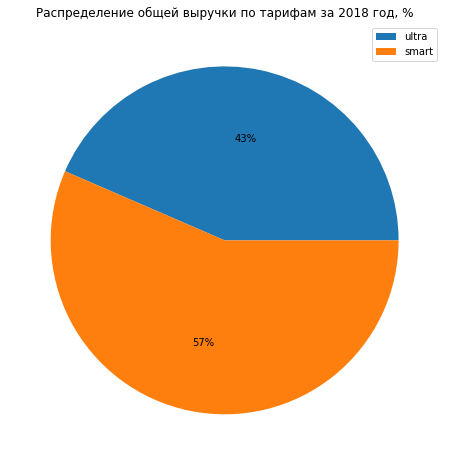

In [63]:
(all_servises.groupby('tariff')['payment_total'].agg('sum').sort_values(ascending=True)
 .plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(8, 8), title='Распределение общей выручки по тарифам за 2018 год, %'))
plt.show()

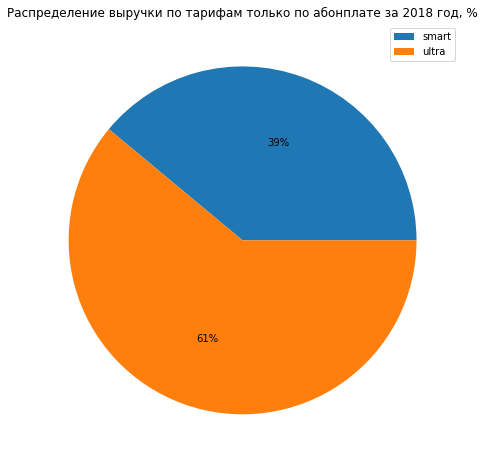

In [64]:
(all_servises.groupby('tariff')['monthly_payment'].agg('sum').sort_values(ascending=True)
 .plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(8, 8), title='Распределение выручки по тарифам только по абонплате за 2018 год, %'))
plt.show()

### Вывод

- Данные для анализа состоят из 5 таблиц со срезами данных для пятисот абонентов и описанием количества телефонного  и интернет-трафика, а также данных о количестве сообщений. Все таблицы содержат даты.

- В таблице calls обнаружено значительное количество нулей в столбце телефонного трафика. Предполагается, что это звонки без установления соединения. Также указанные значения указаны в формате float-  вещественных чисел с плавающей запятой. При этом в компании принято, что  любой трафик (телефонный и интернет-трафик) округляется  вверх до целого значения. Вероятно, речь идёт об особенностях биллинговой системы. Поэтому  значения были округлены до минут вверх, как было предусмотрено в условии
- В процессе предобработки составлены таблицы, где помесячно для каждого абонента посчитан весь объём потребляемых услуг.

- Осуществлёна смена типа данных для дат с object в datetype во всех таблицах.

- Созданы функции для расчёта выручки по трафикам, использованым сверхлимита.

- Основная часть выручки по абонентской плате приходится на тарифный план Ultra, что является логичным: абонентска плата за использование этого тарифа превышает абонентскую плату за Smart в 3,5 раза. Достаточно ёмкий пакет Ultra также позволяет своим пользователям довольно редко выходить за рамки лимитов, поэтому в Smart оплата за превышающий лимит трафик больше. 


# Шаг 3. Анализ данных <a name="шаг-3"></a>

## 3.1. Описание поведения абонентов <a name="шаг-3-1"></a> 

Разделим данные по тарифам

In [65]:
all_servises_smart = all_servises.query('tariff == "smart"').reset_index()

In [66]:
all_servises_ultra =  all_servises.query('tariff == "ultra"').reset_index()

In [67]:
all_servises_smart

,index,user_id,month,gb_used,duration,sms,city,tariff,monthly_payment,ex_payment_gb,ex_payment_minutes,ex_payment_sms,ex_payment_total,payment_total
0,8,1001,2018-11-01,18,430,0,Москва,smart,550,600,0,0,600,1150
1,9,1001,2018-12-01,13,414,0,Москва,smart,550,0,0,0,0,550
2,10,1002,2018-06-01,10,117,4,Стерлитамак,smart,550,0,0,0,0,550
3,11,1002,2018-07-01,17,214,11,Стерлитамак,smart,550,400,0,0,400,950
4,12,1002,2018-08-01,19,289,13,Стерлитамак,smart,550,800,0,0,800,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,3199,1499,2018-09-01,1,70,11,Пермь,smart,550,0,0,0,0,550
2225,3200,1499,2018-10-01,17,449,48,Пермь,smart,550,400,0,0,400,950
2226,3201,1499,2018-11-01,17,612,59,Пермь,smart,550,400,336,27,763,1313
2227,3202,1499,2018-12-01,12,492,66,Пермь,smart,550,0,0,48,48,598


### 3.1.1. Тариф Smart <a name="шаг-3-1-1"></a> 

In [68]:
all_servises_smart[['gb_used', 'duration', 'sms', 'monthly_payment', 'ex_payment_total', 'payment_total']].agg(['min', 'max', 'median','mean','var','std']).style.format("{:.1f}")

,gb_used,duration,sms,monthly_payment,ex_payment_total,payment_total
min,0.0,0.0,0.0,550.0,0.0,550.0
max,37.0,1435.0,143.0,550.0,6020.0,6570.0
median,16.0,422.0,28.0,550.0,369.0,919.0
mean,15.4,417.9,33.4,550.0,627.3,1177.3
var,33.1,36219.3,796.8,0.0,578117.4,578117.4
std,5.8,190.3,28.2,0.0,760.3,760.3


In [69]:
all_servises_smart[['gb_used', 'duration', 'sms',  'ex_payment_total']].corr()

,gb_used,duration,sms,ex_payment_total
gb_used,1.000000,0.338892,0.145385,0.815982
duration,0.338892,1.000000,0.203091,0.419351
sms,0.145385,0.203091,1.000000,0.128559
ex_payment_total,0.815982,0.419351,0.128559,1.000000


Для абонентов тарифного плана Смарт зависимость между видами услуг отсутствует  - незначительные коэффициенты корреляции. Это означает, что если абонент осуществляет, например, большое количество звонков, то это никак не отражается на объёме потребляемого им трафика интернет или на количестве отправленных СМС. 
Прямо пропорциональная  взаимосвязь отражается лишь для показателей интернет-трафика и оплаты сверх лимита. 

**Тариф Smart- Интернет**

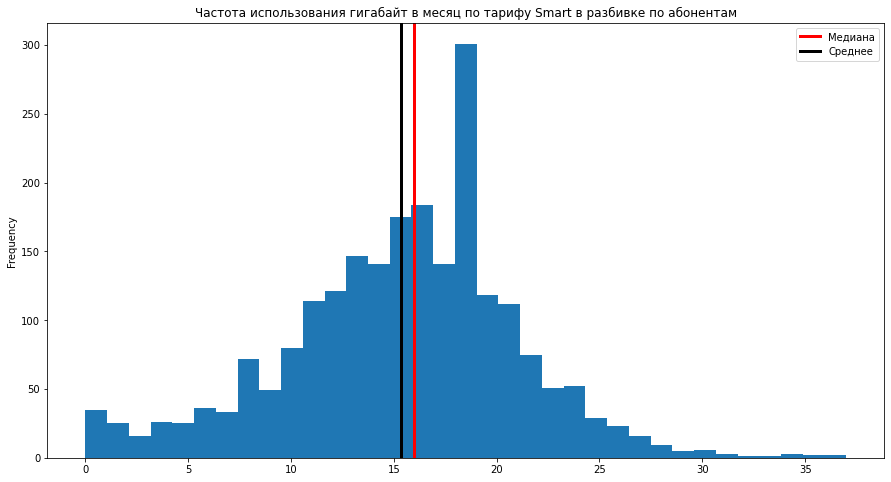

In [70]:
all_servises_smart['gb_used'].plot(kind='hist', bins=35, figsize=(15,8), )
plt.axvline(x=all_servises_smart['gb_used'].median(),linewidth=3, color='red', linestyle='-')
plt.axvline(x=all_servises_smart['gb_used'].mean(),linewidth=3, color='black', linestyle='-')
plt.legend(['Медиана','Среднее'])
plt.title('Частота использования гигабайт в месяц по тарифу Smart в разбивке по абонентам');

Диаграмма выше отражает нормальное распределение данных по использованию Гигабайт. Данные несколько скошены влево, т.к. медиана больше среднего.
Пользователи услуги интернет тарифного плана Смарт в большинстве случаев используют сверхлимитный трафик. Ориентируясь на величину медианы можно сказать, что основная группа пользователей оплачивает сверхнормативный трафик в размере, равном абонентской плате. 
На графике отчётливо видны выбросы. Используем правило Трёх Сигм чтобы выявить и удалить выбросы для дальнейшего анализа:

In [71]:
all_servises_smart['gb_used'].mean()+3*all_servises_smart['gb_used'].std()

32.63231780508222

Таким образом, для дальнейшего анализа значения по ежемесячному трафику выше 32,7 Гб/месяц не имеют смысла и будут удалены из анализа.


**Тариф Smart- Телефония**

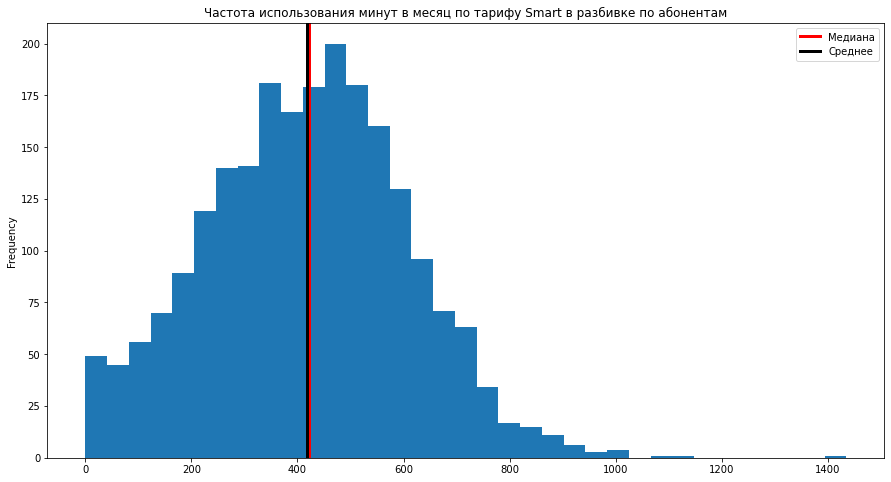

In [72]:
all_servises_smart['duration'].plot(kind='hist', bins=35, figsize=(15,8))
plt.axvline(x=all_servises_smart['duration'].median(),linewidth=3, color='red', linestyle='-')
plt.axvline(x=all_servises_smart['duration'].mean(),linewidth=3, color='black', linestyle='-')
plt.legend(['Медиана','Среднее'])
plt.title('Частота использования минут в месяц по тарифу Smart в разбивке по абонентам');

Для телефонии медианное и среднее значения  практически совпадают. Это говорит о небольшом количестве выбросов. Основная масса абонентов Смарт старается не превышать отведённый им лимит минут для звонков.  
Распределение нормальное. Используем правило Трёх Сигм чтобы выявить и удалить выбросы для дальнейшего анализа:

In [73]:
all_servises_smart['duration'].mean()+3*all_servises_smart['duration'].std()

988.8761380749961

Количество минут свыше 988,88  в месяц для анализа не имеет смысла и может быть удалено.


**Тариф Smart- Сообщения**

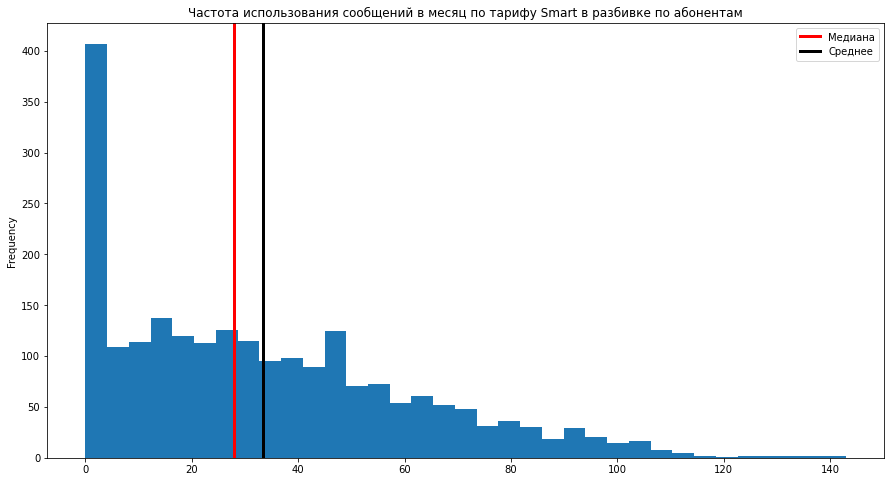

In [74]:
all_servises_smart['sms'].plot(kind='hist', bins=35, figsize=(15,8))
plt.axvline(x=all_servises_smart['sms'].median(),linewidth=3, color='red', linestyle='-')
plt.axvline(x=all_servises_smart['sms'].mean(),linewidth=3, color='black', linestyle='-')
plt.legend(['Медиана','Среднее'])
plt.title('Частота использования сообщений в месяц по тарифу Smart в разбивке по абонентам');

Среднее и медиана по частоте использования смс говорит о редком превышении лимита в 50 сообщений (среднее - 33.4, медиана - 28.0).
Данные  скошены вправо, т.к. медиана меньше среднего.
С условием нормального распределения используем правило Трёх Сигм чтобы выявить и удалить выбросы для дальнейшего анализа:

In [75]:
all_servises_smart['sms'].mean()+3*all_servises_smart['sms'].std()

118.06765538271134

Количество смс свыше 118,1  в месяц для анализа не имеет смысла и может быть удалено.


### 3.1.2. Тариф Ultra <a name="шаг-3-1-2"></a> 

In [76]:
all_servises_ultra[['gb_used', 'duration', 'sms', 'monthly_payment', 'ex_payment_total', 'payment_total']].agg(['min', 'max', 'median','mean','var','std']).style.format("{:.1f}")

,gb_used,duration,sms,monthly_payment,ex_payment_total,payment_total
min,0.0,0.0,0.0,1950.0,0.0,1950.0
max,48.0,1673.0,224.0,1950.0,2700.0,4650.0
median,18.0,518.0,38.0,1950.0,0.0,1950.0
mean,18.5,526.6,49.4,1950.0,100.7,2050.7
var,96.9,100873.6,2285.3,0.0,114727.7,114727.7
std,9.8,317.6,47.8,0.0,338.7,338.7


In [77]:
all_servises_ultra[['gb_used', 'duration', 'sms','ex_payment_total']].corr()

,gb_used,duration,sms,ex_payment_total
gb_used,1.000000,0.176591,0.173940,0.596056
duration,0.176591,1.000000,0.082084,0.092544
sms,0.173940,0.082084,1.000000,0.016143
ex_payment_total,0.596056,0.092544,0.016143,1.000000


Для абонентов тарифного плана Ультра  зависимость между видами услуг отсутствует, также, как и в случае с тарифным планом Смарт: уменьшение или увеличение потребления одного вида сервиса не сказывается на снижении или росте объёма потребления других сервисов внутри тарифного плана. Небольшая зависимость наблюдается для объёма использованного трафика интернет и стоимости оплаты за услуги сверх лимита.

**Тариф Ultra- Интернет**

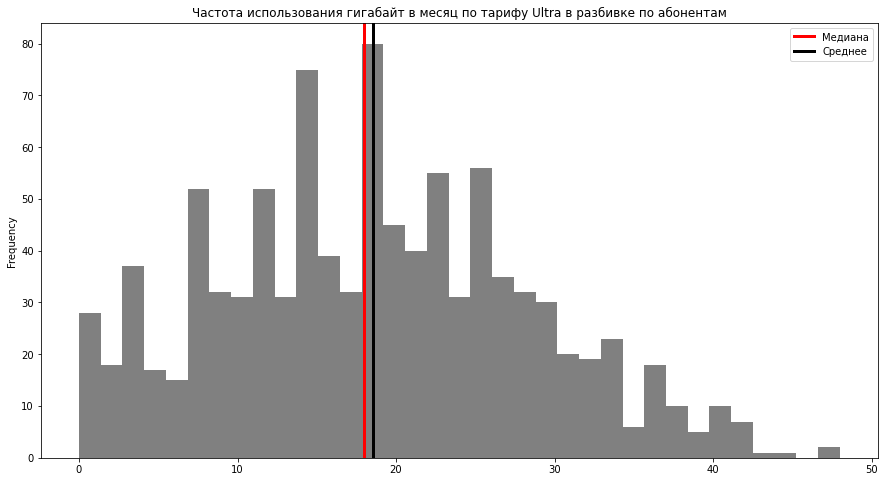

In [78]:
all_servises_ultra['gb_used'].plot(kind='hist', bins=35, figsize=(15,8), color='grey')
plt.axvline(x=all_servises_ultra['gb_used'].median(),linewidth=3, color='red', linestyle='-')
plt.axvline(x=all_servises_ultra['gb_used'].mean(),linewidth=3, color='black', linestyle='-')
plt.legend(['Медиана','Среднее'])
plt.title('Частота использования гигабайт в месяц по тарифу Ultra в разбивке по абонентам');

Диаграмма выше отражает нормальное распределение данных по использованию Гигабайт. Пользователи услуги интернет тарифного плана Ультра  в большинстве случаев не используют сверхлимитный трафик.  
На графике отчётливо видны выбросы. Используем правило Трёх Сигм чтобы выявить и удалить выбросы для дальнейшего анализа:

In [79]:
all_servises_ultra['gb_used'].mean()+3*all_servises_ultra['gb_used'].std()

48.06850857567695

Таким образом, для дальнейшего анализа значения по ежемесячному трафику выше 48,1 Гб/месяц не имеют смысла и будут удалены из анализа.

**Тариф Ultra- Телефония**

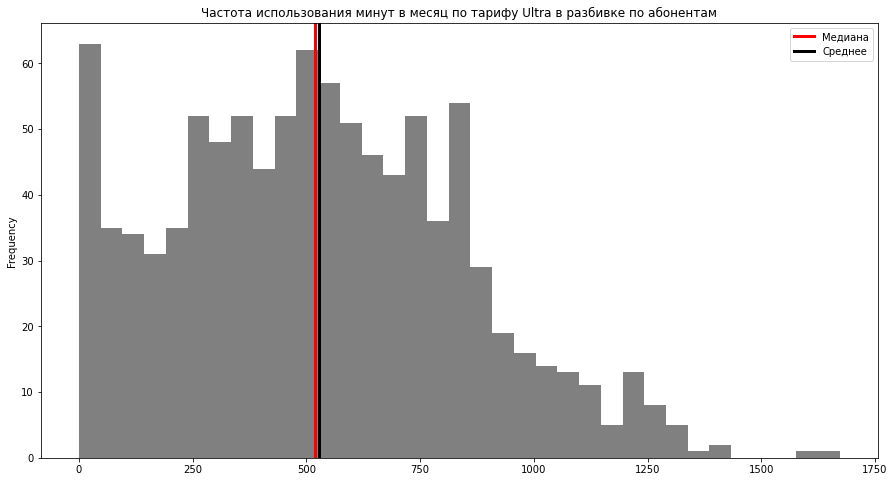

In [80]:
all_servises_ultra['duration'].plot(kind='hist', bins=35, figsize=(15,8), color='grey')
plt.axvline(x=all_servises_ultra['duration'].median(),linewidth=3, color='red', linestyle='-')
plt.axvline(x=all_servises_ultra['duration'].mean(),linewidth=3, color='black', linestyle='-')
plt.legend(['Медиана','Среднее'])
plt.title('Частота использования минут в месяц по тарифу Ultra в разбивке по абонентам');

Для телефонии медианное и среднее значения  практически совпадают. Это говорит о небольшом количестве выбросов. Никто из пользователей не превысил отведённый им лимит для звонков 3000 минут: максимум зафиксирован  на 1579 минуте.  
Распределение нормальное. Используем правило Трёх Сигм чтобы выявить и удалить выбросы для дальнейшего анализа:

In [81]:
all_servises_ultra['duration'].mean()+3*all_servises_ultra['duration'].std()

1479.4416438311864

Количество минут свыше 1479,4  в месяц для анализа не имеет смысла и может быть удалено.


**Тариф Ultra- Сообщения**

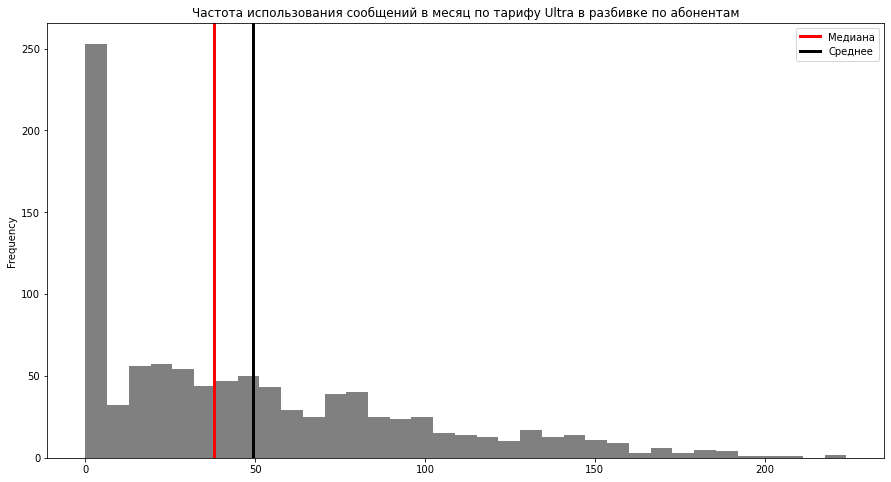

In [82]:
all_servises_ultra['sms'].plot(kind='hist', bins=35, figsize=(15,8), color='grey')
plt.axvline(x=all_servises_ultra['sms'].median(),linewidth=3, color='red', linestyle='-')
plt.axvline(x=all_servises_ultra['sms'].mean(),linewidth=3, color='black', linestyle='-')
plt.legend(['Медиана','Среднее'])
plt.title('Частота использования сообщений в месяц по тарифу Ultra в разбивке по абонентам');

Никто из пользователей услуги смс на тарифном плане Ультра не использовал услуг больше, чем предоставлено тарифным планом: максимальное число сообщений от одного пользователя в месяц составило 224 сообщения при лимите 1000. 
Данные скошены вправо, т.к. медиана меньше среднего.
С условием нормального распределения используем правило Трёх Сигм чтобы выявить и удалить выбросы:

In [83]:
all_servises_ultra['sms'].mean()+3*all_servises_ultra['sms'].std()

192.77682382717393

Количество смс свыше 192,8 в месяц для анализа не имеет смысла и может быть удалено.

### Сравнительная характеристика тарифов

**Интернет**

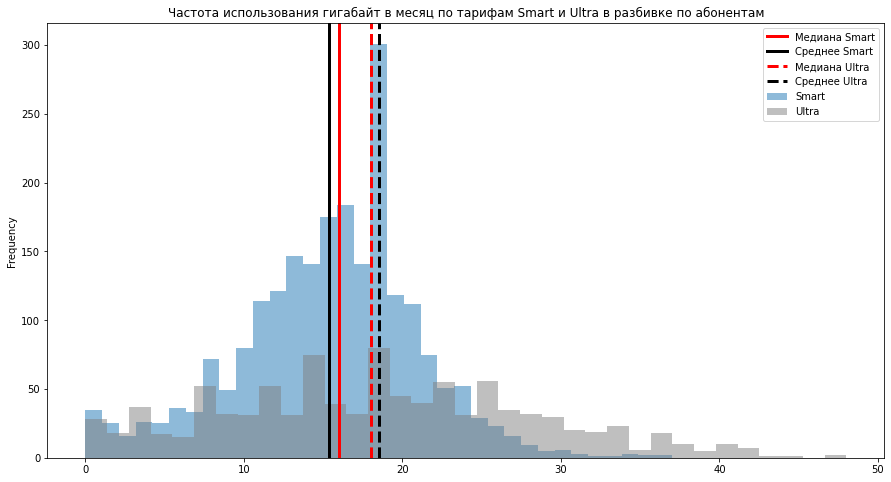

In [84]:
all_servises_smart['gb_used'].plot(kind='hist', bins=35, figsize=(15,8), alpha=0.5)
plt.axvline(x=all_servises_smart['gb_used'].median(),linewidth=3, color='red', linestyle='-')
plt.axvline(x=all_servises_smart['gb_used'].mean(),linewidth=3, color='black', linestyle='-')

all_servises_ultra['gb_used'].plot(kind='hist', bins=35, figsize=(15,8), color='grey', alpha=0.5)
plt.axvline(x=all_servises_ultra['gb_used'].median(),linewidth=3, color='red', linestyle='--')
plt.axvline(x=all_servises_ultra['gb_used'].mean(),linewidth=3, color='black', linestyle='--')
plt.legend(['Медиана Smart','Среднее Smart','Медиана Ultra','Среднее Ultra', 'Smart', 'Ultra'])
plt.title('Частота использования гигабайт в месяц по тарифам Smart и Ultra в разбивке по абонентам');

**Телефония**

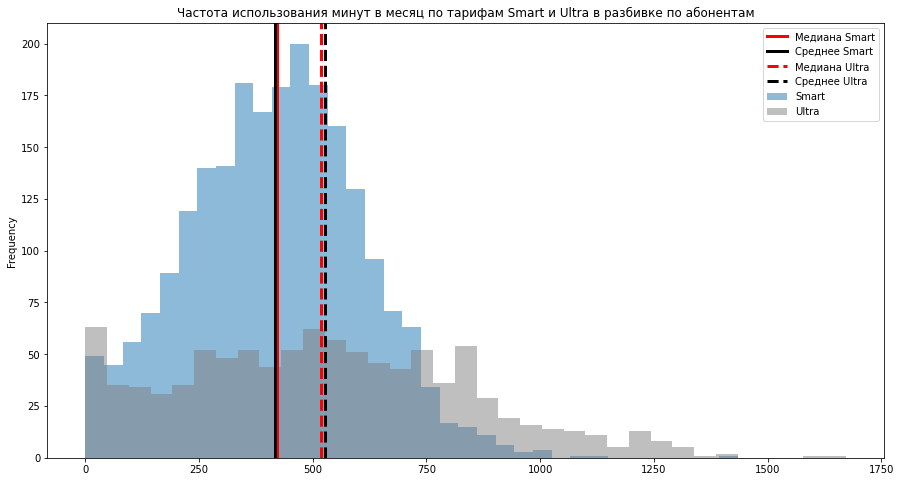

In [85]:
all_servises_smart['duration'].plot(kind='hist', bins=35, figsize=(15,8), alpha=0.5)
plt.axvline(x=all_servises_smart['duration'].median(),linewidth=3, color='red', linestyle='-')
plt.axvline(x=all_servises_smart['duration'].mean(),linewidth=3, color='black', linestyle='-')

all_servises_ultra['duration'].plot(kind='hist', bins=35, figsize=(15,8), color='grey', alpha=0.5)
plt.axvline(x=all_servises_ultra['duration'].median(),linewidth=3, color='red', linestyle='--')
plt.axvline(x=all_servises_ultra['duration'].mean(),linewidth=3, color='black', linestyle='--')
plt.legend(['Медиана Smart','Среднее Smart','Медиана Ultra','Среднее Ultra', 'Smart', 'Ultra'])
plt.title('Частота использования минут в месяц по тарифам Smart и Ultra в разбивке по абонентам');

**Сообщения**

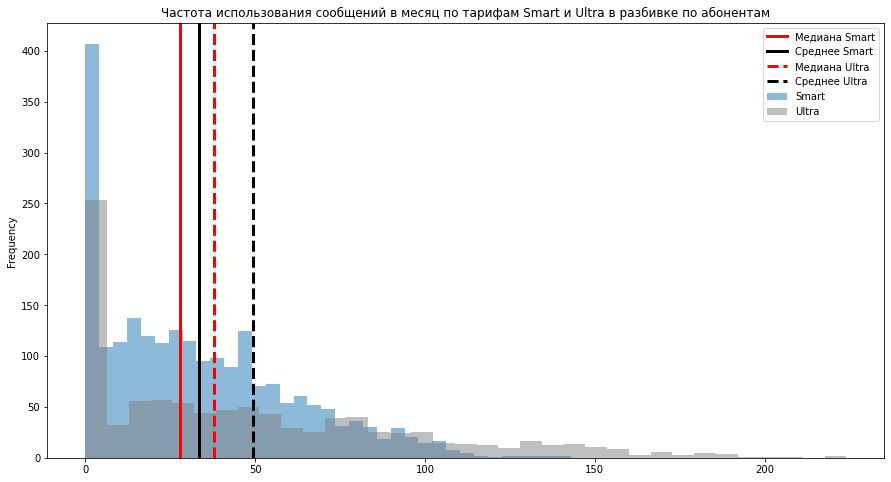

In [86]:
all_servises_smart['sms'].plot(kind='hist', bins=35, figsize=(15,8), alpha=0.5)
plt.axvline(x=all_servises_smart['sms'].median(),linewidth=3, color='red', linestyle='-')
plt.axvline(x=all_servises_smart['sms'].mean(),linewidth=3, color='black', linestyle='-')

all_servises_ultra['sms'].plot(kind='hist', bins=35, figsize=(15,8), color='grey', alpha=0.5)
plt.axvline(x=all_servises_ultra['sms'].median(),linewidth=3, color='red', linestyle='--')
plt.axvline(x=all_servises_ultra['sms'].mean(),linewidth=3, color='black', linestyle='--')
plt.legend(['Медиана Smart','Среднее Smart', 'Медиана Ultra','Среднее Ultra',  'Smart', 'Ultra'])
plt.title('Частота использования сообщений в месяц по тарифам Smart и Ultra в разбивке по абонентам');

In [87]:
smart_money= all_servises_smart[['monthly_payment', 'ex_payment_gb', 'ex_payment_minutes', 'ex_payment_sms', 'ex_payment_total', 'payment_total']].sum().reset_index()
ultra_money= all_servises_ultra[['monthly_payment', 'ex_payment_gb', 'ex_payment_minutes', 'ex_payment_sms', 'ex_payment_total', 'payment_total']].sum().reset_index()

In [88]:
smart_money

,index,0
0,monthly_payment,1225950
1,ex_payment_gb,1081200
2,ex_payment_minutes,278217
3,ex_payment_sms,38784
4,ex_payment_total,1398201
5,payment_total,2624151


In [89]:
ultra_money

,index,0
0,monthly_payment,1920750
1,ex_payment_gb,99150
2,ex_payment_minutes,0
3,ex_payment_sms,0
4,ex_payment_total,99150
5,payment_total,2019900


### Вывод
-  Абоненты тарифного плана Смарт чаще превышали лимиты по услуге интернет, чем пользователи интренет Ультра.

- Телефония в обоих тарифных планах отличается очень высоким показателем дисперсии, что говорит о высокой степени разброса значений  в ряде данных.

- С учётом нормального распределения данных были определены выбросы по каждому из сервисов для каждого тарифного плана. 

- Пользователи тарифного плана Ультра не превышали установленные лимиты по услугам телефония и отправка сообщений в течение исследуемого периода.

- Между объёмом использования сервисов в рамках одного тарифного плана отсутствует корреляция: увеличение или сокращение использования одной из услуг не приводит к увеличению или снижению объёма потребления других услуг.

- Пользователи интернет, независимо от тарифного плана используют близкие значения трафика по медиане: 17 для Смарт и 19 для Ультра. Следовательно, уже на этом этапе можно предполагать, что тарифный план Смарт для услуг интернет может быть более выгоден для компании Мегалайн. 

- Для обоих тарифных планов наблюдается взаимосвязь между оплатой сверх лимита и количеством потребляемых гигабайт интернет-трафика. Причём, эта связь сильнее для тарифного плана Смарт.

- Сравнение частот использования услуг в разрезе тарифных планов ярко отражает разницу между тарифами: тариф Смарт используется более активно. Причина очевидна - Смарт использует гораздо большее число абонентов.

# Шаг 4. Проверка гипотез <a name="шаг-4"></a>

## 4.1. Гипотеза: средняя выручка пользователей тарифов Смарт и Ультра различается<a name="шаг-4-1"></a>

Сформулируем гипотезы:

- H0 - нулевая гипотеза: выручка пользователей тарифов Смарт и Ультра **не различается**
- H1 - альтернативная гипотеза: выручка пользователей тарифов Смарт и Ультра **различается**

Для проверки данных гипотез проведём статистический тест и расчитаем покзатель значение вероятности (p-value) с учетом заданного показтеля критического уровня статистической значимости alpha. Пороговое значение альфа зададим в размере 5%. 

Если p-value окажется меньше alpha - отвергнем гипотезу.


In [90]:
smart = all_servises_smart['payment_total'] #создадим Series для итоговой выручки каждого тарифного плана
ultra = all_servises_ultra['payment_total']

In [91]:
#smart = smart[~((smart-smart.mean()).abs() > 3*smart.std())] #устраняем выбросы за пределами 3 сигм

In [92]:
#ultra = ultra[~((ultra-ultra.mean()).abs() > 3*ultra.std())] 

In [93]:
alpha = 0.05 # критический уровень статистической значимости

In [94]:
results = st.ttest_ind(ultra, smart)

print('p-значение:', results.pvalue) 

p-значение: 7.304764020044488e-223


In [95]:
print('cредняя выручка смарт:', smart.mean())
print('cредняя выручка ультра:', ultra.mean())


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

cредняя выручка смарт: 1177.277254374159
cредняя выручка ультра: 2050.659898477157
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: выручка между двумя тарифами различается. Показатель p-значения чрезвычайно мал: 7.304764020044488e-223

Если устранить выбросы,  то p-значение будет ещё меньше: : 1.9422742473718032e-268, тк к выбросам будут отнесены случаи превышения лимита по Ультра (по Ультра превышений лимита немного, и все эти превышения автоматически попадают в выбросы) и ряд становится однородным, отражающим только абонентскую плату. 

## 4.2. Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов<a name="шаг-4-2"></a>

Сформулируем гипотезы:

- H0 - нулевая гипотеза: между группами А1 и А2 
- H1 - альтернативная гипотеза: выручка пользователей из Москвы и Регионов **различается**

 наличия значимых стат.различий в долях при проведении Z тестов

Для проверки данных гипотез также расчитаем покзатель значение вероятности (p-value) с учетом заданного показателя критического уровня статистической значимости alpha. Пороговое значение альфа зададим в размере 5%. 

Если p-value окажется меньше alpha - отвергнем гипотезу.

In [96]:
moscow = all_servises.query('city == "Москва"').reset_index()   #создадим таблицы для итоговой выручки по Москве и Регионам
regions = all_servises.query('city != "Москва"').reset_index()

In [97]:
moscow_revenue = moscow['payment_total']

In [98]:
regions_revenue = regions['payment_total']

In [99]:
#moscow_revenue = moscow_revenue[~((moscow_revenue-moscow_revenue.mean()).abs() > 3*moscow_revenue.std())] #устраняем выбросы за пределами 3 сигм

In [100]:
#regions_revenue = regions_revenue[~((regions_revenue-regions_revenue.mean()).abs() > 3*regions_revenue.std())] 

In [101]:
alpha = 0.05 # критический уровень статистической значимости

In [102]:
results = st.ttest_ind(moscow_revenue, regions_revenue)

print('p-значение:', results.pvalue) 

p-значение: 0.3729729010391226


In [103]:
print('cредняя выручка по Москве:', moscow_revenue.mean())
print('cредняя выручка по регионам:', regions_revenue.mean())


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

cредняя выручка по Москве: 1470.0360065466448
cредняя выручка по регионам: 1439.054552439493
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу: выручка от пользователей из  Москвы и Регионов практически одинакова с вероятностью 37%.  
Если устранить выбросы,  то p-значение будет меньше (25%) за счёт устранения высоких показателей по некоторым регионам, однако показатель p-значения будет всё еще выше установленного уровня статистической значимости.

### Вывод

Раздел Шаг 4 предполагал проверку двух гипотез о различии выручки.  Для проверки  гипотез проведён статистический тест и рассчитан покзатель значение вероятности (p-value) с учетом заданного показателя критического уровня статистической значимости alpha. Пороговое значение альфа было задано и в одном и в другом случае равное 5%. На основании полученного p-value и сравнения его с показателем критического уровня статистической значимости гипотезы отвергались или не отвергались. 

1) Подтвержена гипотеза о различии средней выручки пользователей тарифов Смарт и Ультра:
    - В качестве нулевой гипотезы было озучено: выручка пользователей тарифов Смарт и Ультра не различается, соответственно, альтернативная гипотеза предполагала различие между выручками тарифов Смарт и Ультра. 
    - Нулевая гипотеза была отвергнута т.к. показатель p-значения чрезвычайно мал: 7.304764020044488e-223. Отвергая нулевую гипотезу мы принимаем, что выручка между двумя тарифами Смари и Ультра различается и гипотеза о различии средней выручки пользователей тарифов Смарт и Ультра подтверждается. 
    
2) Отвергнута гипотеза об отличии средней выручки пользователей из Москвы  от выручки пользователей из других регионов:
    - В качестве нулевой гипотезы было озучено:  выручка пользователей из Москвы и Регионов не различается. Соответственно, альтернативная гипотеза предполагала различие между выручками пользователей из Москвы и Регионов. 
    - Нулевую гипотезу не получилось отвергнуть, т.к. выручка между двумя тарифами практически одинакова с вероятностью 37%.
    Поскольку нулевая гипотеза не была отвегнута мы принимаем, что гипотеза об отличии средней выручки пользователей из Москвы  от выручки пользователей из других регионов не подтверждается. 
  

# Общие выводы <a name="шаг-5"></a>

Сравнение частот использования услуг в разрезе тарифных планов ярко отражает разницу между тарифами: тариф Смарт используется более активно. Причина очевидна - Смарт использует в 2,2 раза большее число абонентов.

В целом выручка от тарифа Smart составила за год 2,80 млн.рублей при общем количестве абонентов (для данного среза)  - 2229, выручка от тарифа Ultra за этот же период 2,04 млн.рублей при общем количестве абонентов 985. 

Основная часть выручки по абонентской плате приходится на тарифный план Ultra, что является логичным: абонентска плата за использование этого тарифа превышает абонентскую плату за Smart в 3,5 раза. Достаточно ёмкий пакет Ultra также позволяет своим пользователям довольно редко выходить за рамки лимитов. Но превышение общей выручки по Smart по сравнению с Ultra объясняется оплатой за услуги, не предусмотренные лимитом. Как правило, пользователи Smart переплачивают за услуги Интернет.
Важным фактором является практически одинаковый объем (по медиане) потребляемого абонентом в месяц для обоих тарифов - 17 для Smart и 19 для Ultra. И если в Ultra этот объём включён, то пользователи  Smart переплачивают за сверхлимитный интернет сумму практически равную сумме абонентской платы. Таким образом сейчас для компании тариф Smart выглядит более привлекательным.  

На основе расчёта корреляции был сделан вывод, что увеличение или сокращение использования одной из услуг не приводит к увеличению или снижению объёма потребления других услуг внутри тарифных планов.  Для обоих тарифных планов наблюдается взаимосвязь между оплатой сверх лимита и количеством потребляемых гигабайт интернет-трафика. Причём, эта связь сильнее для тарифного плана Smart.

На основе гипотез о  различии выручки между тарифами Смарт и Ультра и различии выручки от услуг в Москве и Регионах были сделаны  следующие выводы: тарифные планы приносят различную выручку, а абоненты в регионах генерят выручку практически не отличающуюся от выручки абонентов в других регионах страны. 


# Рекомендации <a name="шаг-6"></a>
Сейчас для компании тариф Smart выглядит более привлекательным: количество абонентов более чем в два раза превышает количество абонентов по тарифу Ultra. Выручка от Smart также на 30% превышает выручку от услуг тарифа Ultra. Превышение это обусловлено тем, что абонентам Smart очевидно не достаточно предложенного лимитом интернет-трафика в размере 15 Гб и они вынуждены переплачивать за дополнительный трафик. Медианные значения использованных гигабайт составляют 17 и 19 Гб для Smart и Ultra соответственно, то есть среднестатистический пользователь услуг интернет будет использовать трафик именно в этом интервале. 
Абоненты Smart переплачивают за 2 Гб сверхлимита практически по 400 рублей или 200 рублей за гигабайт, что, очевидно, значительно выше себестоимости. 
Отсюда можно предложить следующие варианты оптимизации  тарифов:

1) снизить стомость услуг интернет сверх тарифного пакета Smart с 200 рублей за Гб до 150 рублей. В этом случае медианное значение потребления трафика может вырасти до  19 Гб, что приведёт к небольшому росту выручки.

2) увеличить абонентскую плату  тарифного пакета Smart, увеличив количество включенных в пакет Гб с 15 до 20 Гб. 

3) снизить абонентскую плату за использование тарифа Ultra. Это может быть оправдвно тем, что абонеты тарифа практически не превышают установленные лимиты и абонентская плата выглядит завышенной. 

Последний третий пункт можно использовать для увеличения привлекательности тарифного плана Ultra. Этот тарифный план имеет большой потенциал и  требует дополнительной рекламы для дальнейшего продвижения и увеличения числа абонентов. Если количество абонентов Ultra приблизится к той же отметке, что и у Smart, выручка по Ultra  вырастет вдвое. 